## Math 32; Fall 2025
### Lectuer 26 - October 31, 2025; Suzanne Fernandes-Sindi
The following code is used to generate examples in Math 32 for Lecture 26. 

## Averages Vary Less

**Goal:** Simulate the running average of uniformly distributed RV's to show that the sample average approaches the expected value. 

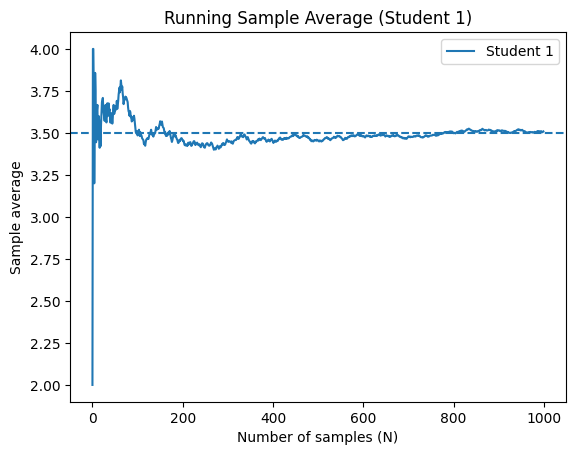

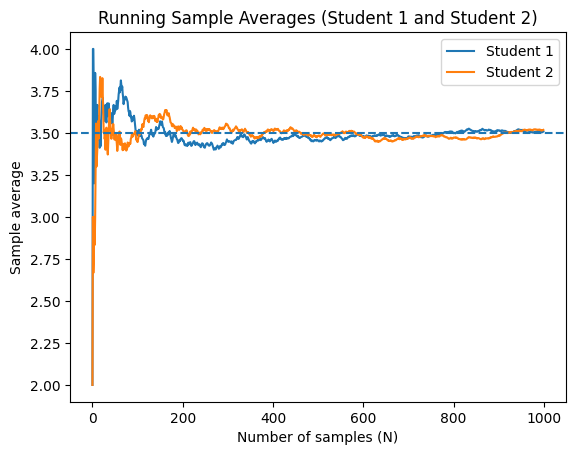

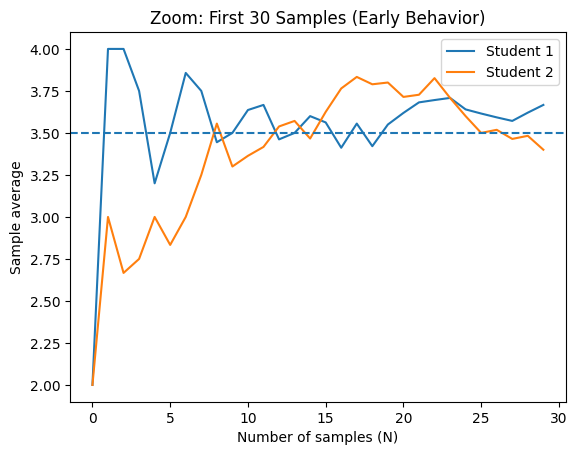

In [5]:
import random
import matplotlib.pyplot as plt

# Number of samples
N = 1000

# Storage
samplesStudent1 = []
running_averagesStudent1 = []

samplesStudent2 = []
running_averagesStudent2 = []

running_sumStudent1 = 0
running_sumStudent2 = 0

for n in range(1, N + 1):
    # Generate a uniform discrete random variable representing a die roll (1-6)
    x = random.randint(1, 6)
    y = random.randint(1, 6)
    samplesStudent1.append(x)
    samplesStudent2.append(y)
    
    # Update running sums and compute averages
    running_sumStudent1 += x
    running_averagesStudent1.append(running_sumStudent1 / n)

    running_sumStudent2 += y
    running_averagesStudent2.append(running_sumStudent2 / n)

# ---- Figure 1: Student 1 only ----
plt.figure()
plt.plot(running_averagesStudent1, label="Student 1")
plt.axhline(y=3.5, linestyle='--')
plt.xlabel("Number of samples (N)")
plt.ylabel("Sample average")
plt.title("Running Sample Average (Student 1)")
plt.legend()
plt.show()

# ---- Figure 2: Student 1 and Student 2 ----
plt.figure()
plt.plot(running_averagesStudent1, label="Student 1")
plt.plot(running_averagesStudent2, label="Student 2")
plt.axhline(y=3.5, linestyle='--')
plt.xlabel("Number of samples (N)")
plt.ylabel("Sample average")
plt.title("Running Sample Averages (Student 1 and Student 2)")
plt.legend()
plt.show()

# ---- Figure 3: Zoom into first 30 samples ----
plt.figure()
plt.plot(running_averagesStudent1[:30], label="Student 1")
plt.plot(running_averagesStudent2[:30], label="Student 2")
plt.axhline(y=3.5, linestyle='--')
plt.xlabel("Number of samples (N)")
plt.ylabel("Sample average")
plt.title("Zoom: First 30 Samples (Early Behavior)")
plt.legend()
plt.show()


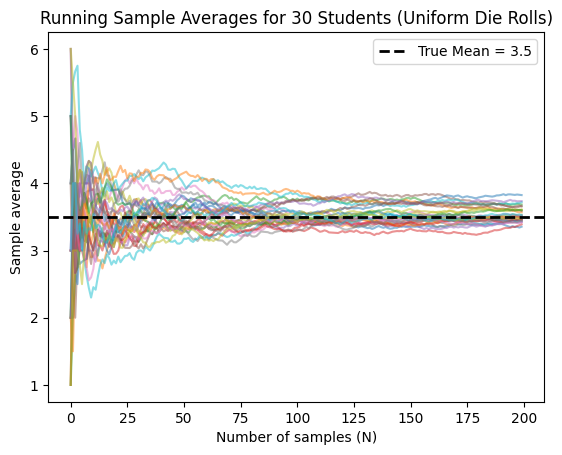

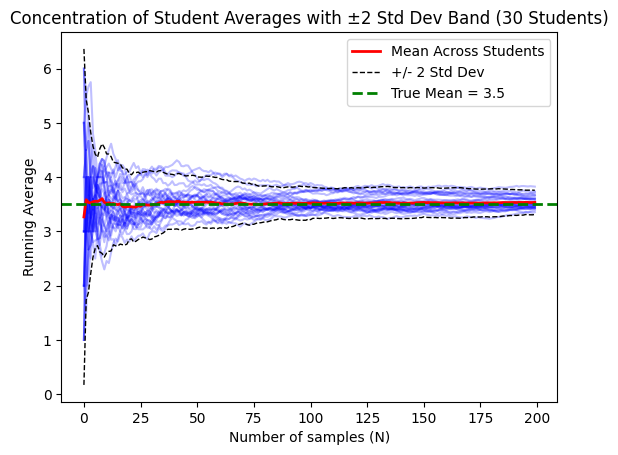

In [8]:
import random
import matplotlib.pyplot as plt
import statistics

# Parameters
N = 200      # number of samples per student
m = 30        # number of students

# Storage: running_averages[i][n] = average for student i at step n
running_averages = [[] for _ in range(m)]

# Simulate
for i in range(m):
    running_sum = 0
    for n in range(1, N + 1):
        x = random.randint(1, 6)   # single die roll
        running_sum += x
        running_averages[i].append(running_sum / n)

# ---- Figure 1: Plot all trajectories ----
plt.figure()
for i in range(m):
    plt.plot(running_averages[i], alpha=0.5)

plt.axhline(y=3.5, linestyle='--', color='black', linewidth=2, label="True Mean = 3.5")
plt.xlabel("Number of samples (N)")
plt.ylabel("Sample average")
plt.title(f"Running Sample Averages for {m} Students (Uniform Die Rolls)")
plt.legend()
plt.show()

# ---- Compute mean and std dev across students at each n ----
mean_across_students = []
std_across_students = []

for n in range(N):
    step_values = [running_averages[i][n] for i in range(m)]
    mean_across_students.append(statistics.mean(step_values))
    std_across_students.append(statistics.pstdev(step_values))  # population std dev

upper = [mean_across_students[n] + 2 * std_across_students[n] for n in range(N)]
lower = [mean_across_students[n] - 2 * std_across_students[n] for n in range(N)]

# ---- Figure 2: Show student trajectories + mean ±2 std band ----
plt.figure()

# Plot all student running averages *lightly*
for i in range(m):
    plt.plot(running_averages[i], alpha=0.25, color='blue')

# Plot the mean curve
plt.plot(mean_across_students, color='red', linewidth=2, label="Mean Across Students")

# Plot the ±2 std deviation band
plt.plot(upper, linestyle='--', color='black', linewidth=1, label="+/- 2 Std Dev")
plt.plot(lower, linestyle='--', color='black', linewidth=1)

plt.axhline(y=3.5, linestyle='--', color='green', linewidth=2, label="True Mean = 3.5")

plt.xlabel("Number of samples (N)")
plt.ylabel("Running Average")
plt.title(f"Concentration of Student Averages with ±2 Std Dev Band ({m} Students)")
plt.legend()
plt.show()


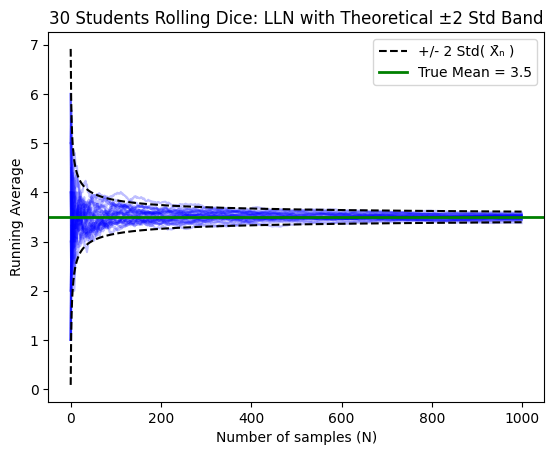

In [9]:
import random
import matplotlib.pyplot as plt
import math

# Parameters
N = 1000      # number of samples per student
m = 30        # number of students
true_mean = 3.5
variance = 35/12   # variance of one die roll

# Storage: running_averages[i][n] = average for student i at step n
running_averages = [[] for _ in range(m)]

# Simulate
for i in range(m):
    running_sum = 0
    for n in range(1, N + 1):
        x = random.randint(1, 6)
        running_sum += x
        running_averages[i].append(running_sum / n)

# --- Compute theoretical ±2 std band ---
upper = []
lower = []
for n in range(1, N + 1):
    std_mean = math.sqrt(variance / n)
    upper.append(true_mean + 2 * std_mean)
    lower.append(true_mean - 2 * std_mean)

# --- Plot ---
plt.figure()

# Plot all student trajectories lightly
for i in range(m):
    plt.plot(running_averages[i], alpha=0.25, color='blue')

# Plot the theoretical ±2 std band
plt.plot(upper, linestyle='--', color='black', label="+/- 2 Std( X̄ₙ )")
plt.plot(lower, linestyle='--', color='black')

# True mean line
plt.axhline(y=true_mean, linestyle='-', linewidth=2, color='green', label="True Mean = 3.5")

plt.xlabel("Number of samples (N)")
plt.ylabel("Running Average")
plt.title(f"{m} Students Rolling Dice: LLN with Theoretical ±2 Std Band")
plt.legend()
plt.show()


## Chebyshev's Inequality Illustration

The basis of the Law of Large Numbers lies in Chebyshev's Inequality which tells us that most random variables are within a predictable range of their variance:


For an arbitrary random variable $Y$ and positive number $a \geq 0$ we have:
$$P(|Y - E[Y]| \geq a) \leq \frac{1}{a^2} \text{Var}(Y)$$

### Goal:
Illustrate Chebyshev's inequality for a couple of distributions.  




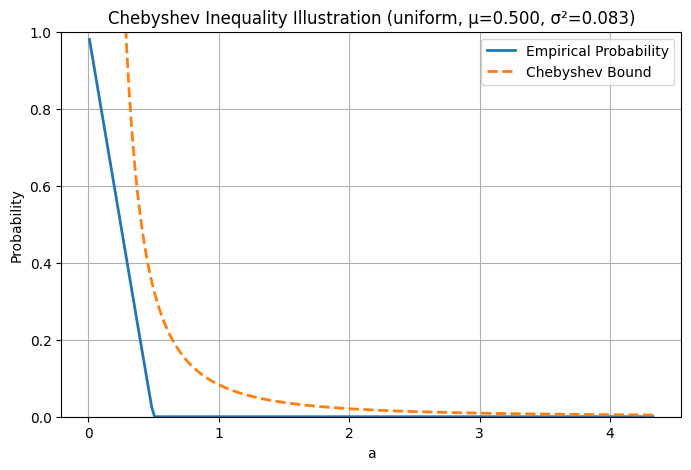

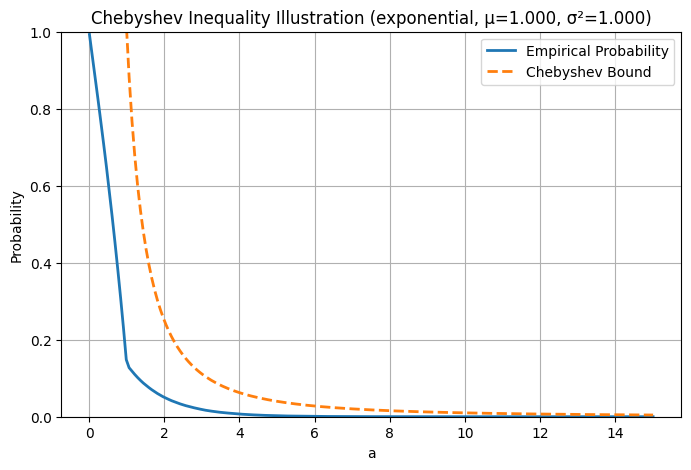

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def illustrate_chebyshev(dist="uniform", lam=1.0, num_samples=200000):
    # Generate random samples
    if dist == "uniform":
        X = np.random.uniform(0, 1, num_samples)
        mu = 0.5
        sigma2 = 1/12
    elif dist == "exponential":
        X = np.random.exponential(1/lam, num_samples)
        mu = 1/lam
        sigma2 = 1/(lam**2)
    else:
        raise ValueError("dist must be 'uniform' or 'exponential'.")

    # Range of a values
    a_values = np.linspace(0.01, 3 * np.sqrt(sigma2)*5, 200)

    empirical_probs = []
    chebyshev_bounds = []

    for a in a_values:
        empirical = np.mean(np.abs(X - mu) >= a)
        empirical_probs.append(empirical)
        chebyshev_bounds.append(sigma2 / (a**2))

    # Plot
    plt.figure(figsize=(8,5))
    plt.plot(a_values, empirical_probs, label="Empirical Probability", linewidth=2)
    plt.plot(a_values, chebyshev_bounds, '--', label="Chebyshev Bound", linewidth=2)
    
    plt.ylim(0, min(1, max(chebyshev_bounds)))
    plt.xlabel("a")
    plt.ylabel("Probability")
    plt.title(f"Chebyshev Inequality Illustration ({dist}, μ={mu:.3f}, σ²={sigma2:.3f})")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
illustrate_chebyshev(dist="uniform")
illustrate_chebyshev(dist="exponential", lam=1.0)
